In [1]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/top-intelligent-people-in-the-world/top_intelligent_people_in_the_world_5000.csv'
df = pd.read_csv(file_path)

# Display column names and first few rows of the dataset
print("Columns in the dataset:")
print(df.columns)

print("\nFirst few rows of the dataset:")
print(df.head())


Columns in the dataset:
Index(['Name', 'Country', 'Field of Expertise', 'IQ', 'Achievements',
       'Birth Year', 'Gender', 'Notable Works', 'Awards', 'Education',
       'Influence'],
      dtype='object')

First few rows of the dataset:
                Name  Country Field of Expertise   IQ  \
0       Enrico Fermi  Austria           Polymath  199   
1         Max Planck    Italy          Chemistry  159   
2         Paul Dirac       UK            Physics  177   
3  Erwin Schrödinger    Italy            Physics  130   
4         Paul Dirac       UK            Physics  163   

                 Achievements  Birth Year  Gender  \
0  Father of Computer Science        1968  Female   
1         Theory of Evolution        1986  Female   
2           Quantum Mechanics        1927  Female   
3   Electromagnetic Induction        1921  Female   
4               Wave Equation        1964  Female   

                            Notable Works               Awards  \
0                               

In [2]:
# Convert 'IQ' and 'Birth Year' to numeric, handling errors
df['IQ'] = pd.to_numeric(df['IQ'], errors='coerce')
df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Drop rows with missing 'IQ' or 'Birth Year'
df_cleaned = df.dropna(subset=['IQ', 'Birth Year'])

# Check data types and cleaned dataset
print("\nData types of each column:")
print(df_cleaned.dtypes)

print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())


Missing values in each column:
Name                     0
Country                  0
Field of Expertise       0
IQ                       0
Achievements             0
Birth Year               0
Gender                   0
Notable Works            0
Awards                1249
Education                0
Influence                0
dtype: int64

Data types of each column:
Name                  object
Country               object
Field of Expertise    object
IQ                     int64
Achievements          object
Birth Year             int64
Gender                object
Notable Works         object
Awards                object
Education             object
Influence             object
dtype: object

First few rows of the cleaned dataset:
                Name  Country Field of Expertise   IQ  \
0       Enrico Fermi  Austria           Polymath  199   
1         Max Planck    Italy          Chemistry  159   
2         Paul Dirac       UK            Physics  177   
3  Erwin Schrödinger    Italy 

In [3]:
# Basic statistics for numerical columns
print("\nBasic statistics of the dataset:")
print(df_cleaned.describe(include='all'))



Basic statistics of the dataset:
                   Name Country Field of Expertise           IQ  \
count              5000    5000               5000  5000.000000   
unique               20       7                  7          NaN   
top     Stephen Hawking      UK            Physics          NaN   
freq                283    2235               2213          NaN   
mean                NaN     NaN                NaN   164.765200   
std                 NaN     NaN                NaN    20.524169   
min                 NaN     NaN                NaN   130.000000   
25%                 NaN     NaN                NaN   147.000000   
50%                 NaN     NaN                NaN   165.000000   
75%                 NaN     NaN                NaN   182.000000   
max                 NaN     NaN                NaN   200.000000   

             Achievements   Birth Year Gender   Notable Works       Awards  \
count                5000  5000.000000   5000            5000         3751   
uniqu

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


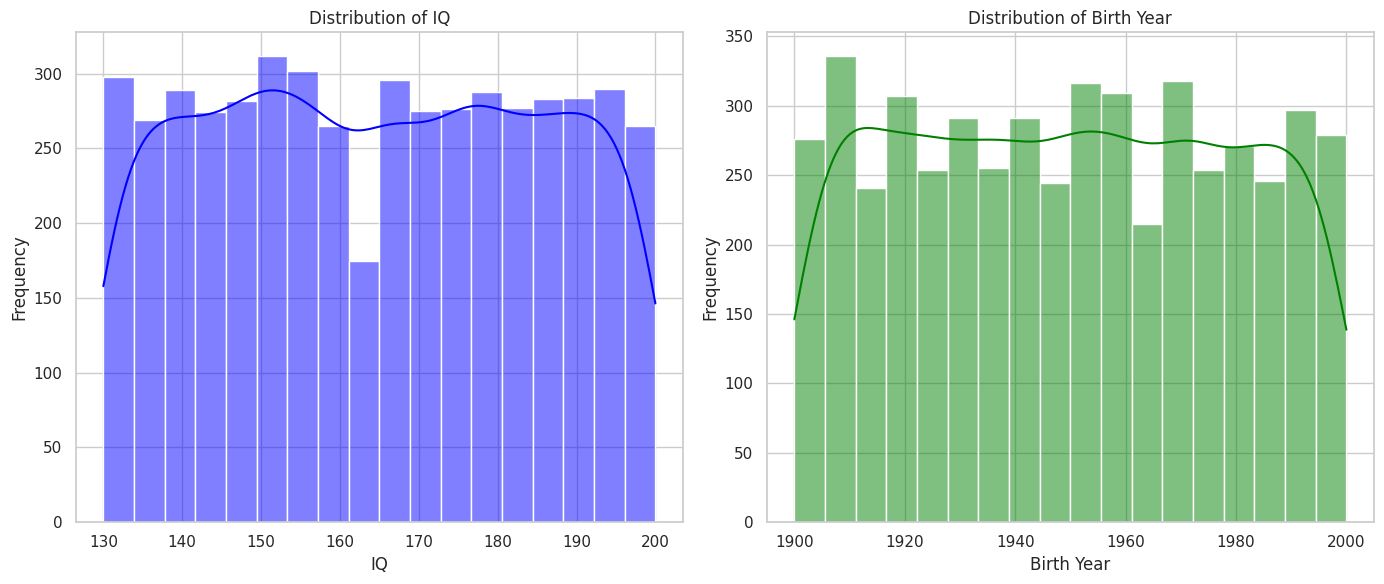

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create histograms for 'IQ' and 'Birth Year'
plt.figure(figsize=(14, 6))

# Plot histogram for 'IQ'
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['IQ'], kde=True, color='blue')
plt.title('Distribution of IQ')
plt.xlabel('IQ')
plt.ylabel('Frequency')

# Plot histogram for 'Birth Year'
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Birth Year'], kde=True, color='green')
plt.title('Distribution of Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Mean IQ by Field of Expertise:
Field of Expertise
Chemistry      165.648330
Mathematics    165.058586
Physics        164.898328
Biology        164.629344
Astronomy      164.297552
Polymath       163.362869
Engineering    163.160920
Name: IQ, dtype: float64


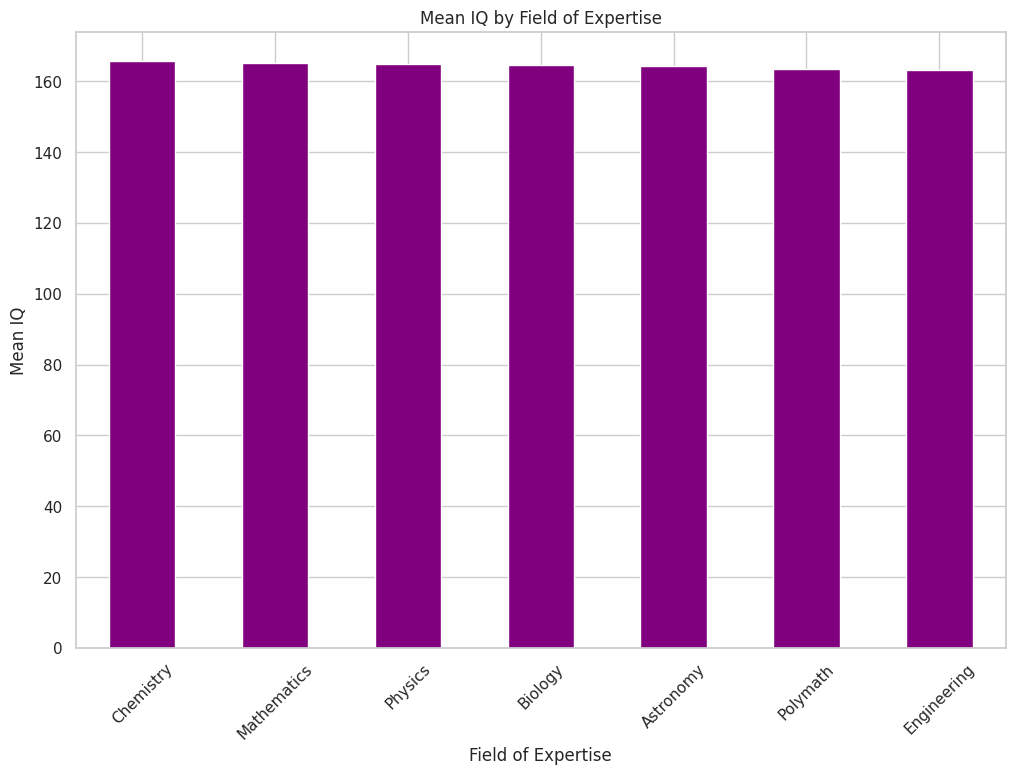

In [5]:
# Group by 'Field of Expertise' and calculate mean IQ
field_of_expertise_mean_iq = df_cleaned.groupby('Field of Expertise')['IQ'].mean().sort_values(ascending=False)

# Display mean IQ by field of expertise
print("Mean IQ by Field of Expertise:")
print(field_of_expertise_mean_iq)

# Plot mean IQ by field of expertise
plt.figure(figsize=(12, 8))
field_of_expertise_mean_iq.plot(kind='bar', color='purple')
plt.title('Mean IQ by Field of Expertise')
plt.xlabel('Field of Expertise')
plt.ylabel('Mean IQ')
plt.xticks(rotation=45)
plt.show()



Number of people by Gender:
Gender
Male      2506
Female    2494
Name: count, dtype: int64


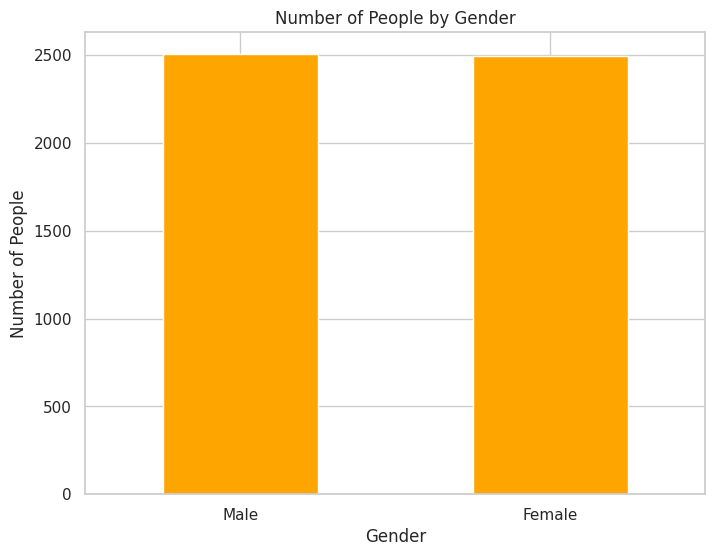

In [6]:
# Count the number of individuals by gender
gender_counts = df_cleaned['Gender'].value_counts()

# Display number of people by gender
print("\nNumber of people by Gender:")
print(gender_counts)

# Plot number of people by gender
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='orange')
plt.title('Number of People by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()



Number of people by Country:
Country
UK         2235
USA         987
Italy       786
Denmark     257
France      249
Germany     245
Austria     241
Name: count, dtype: int64


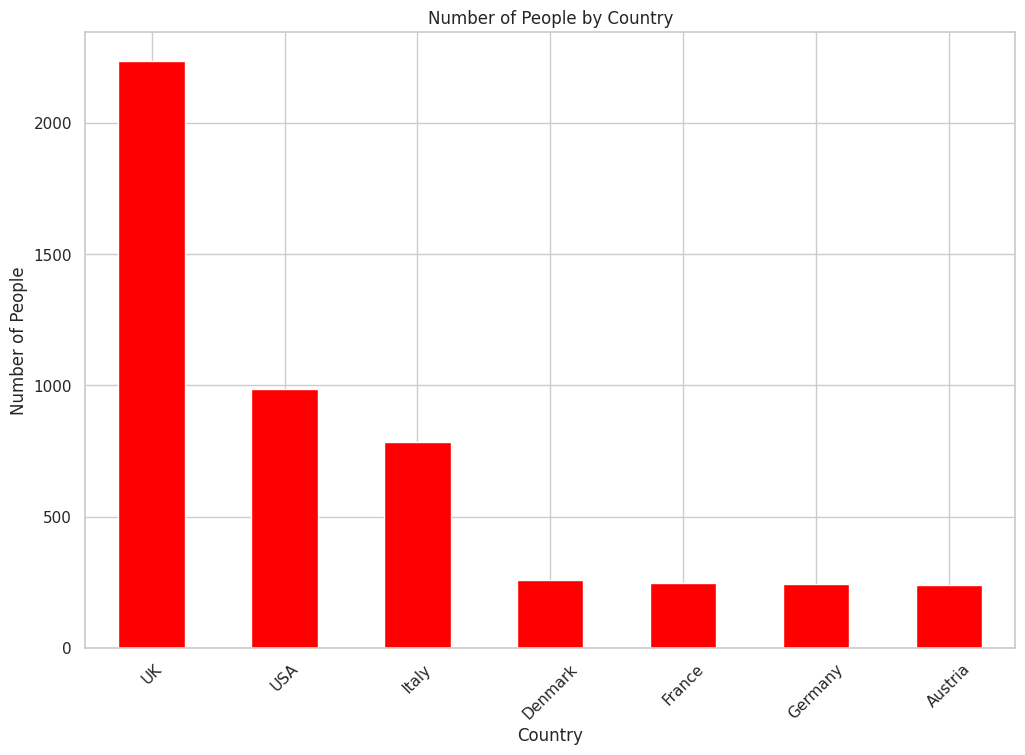

In [7]:
# Count the number of individuals by country
country_counts = df_cleaned['Country'].value_counts()

# Display number of people by country
print("\nNumber of people by Country:")
print(country_counts)

# Plot number of people by country
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='red')
plt.title('Number of People by Country')
plt.xlabel('Country')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


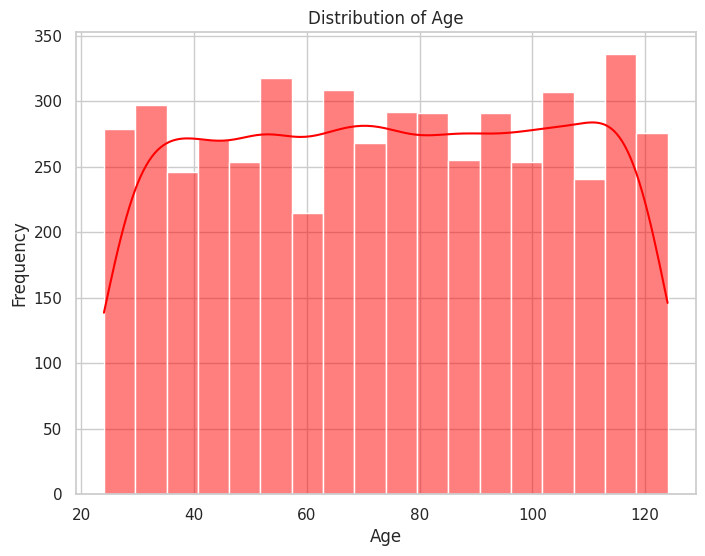

In [8]:
# Calculate age
current_year = pd.Timestamp.now().year
df_cleaned['Age'] = current_year - df_cleaned['Birth Year']

# Plot histogram for 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Age'], kde=True, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



Top Achievements:
Achievements
Quantum Mechanics               512
Father of Computer Science      285
Electromagnetic Theory          277
Quantum Electrodynamics         267
Cosmos Series                   263
Theory of Evolution             262
AC Electricity, Tesla Coil      258
Quantum Theory                  257
General Theory of Relativity    254
Wave Equation                   247
Name: count, dtype: int64


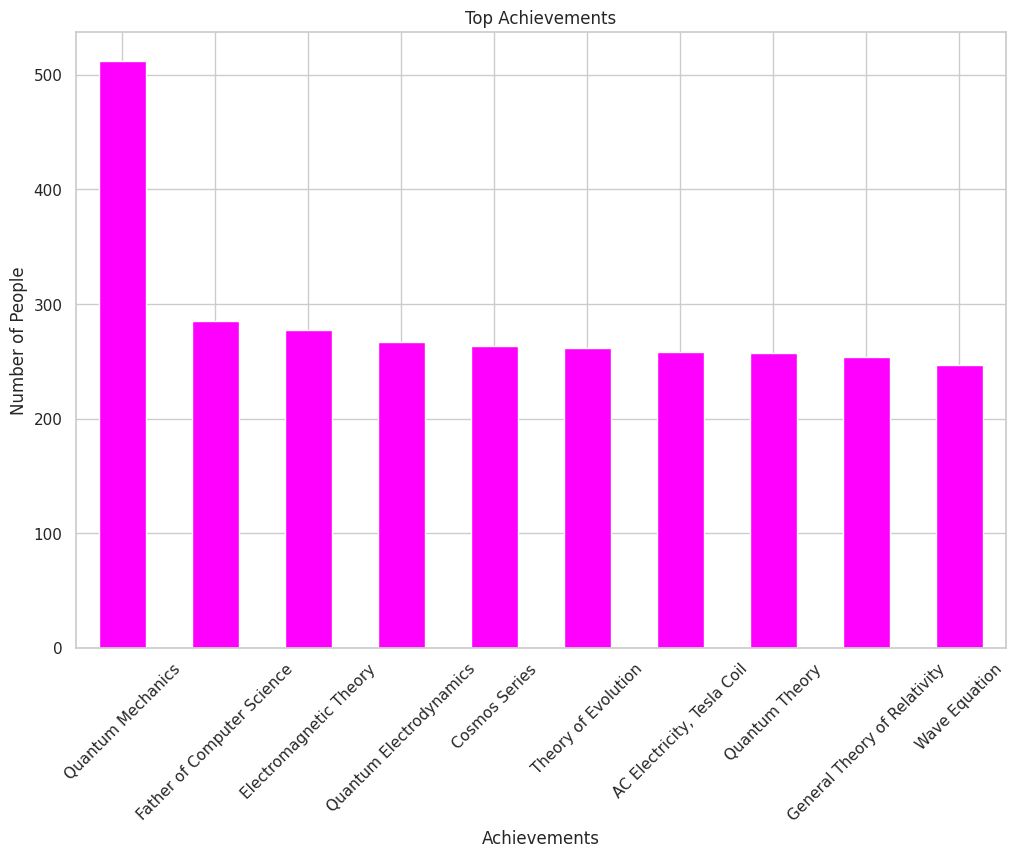

In [9]:
# Count the number of people with each achievement
achievements_counts = df_cleaned['Achievements'].value_counts()

# Display top achievements
print("\nTop Achievements:")
print(achievements_counts.head(10))

# Plot top achievements
plt.figure(figsize=(12, 8))
achievements_counts.head(10).plot(kind='bar', color='magenta')
plt.title('Top Achievements')
plt.xlabel('Achievements')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()



Education Levels:
Education
Ph.D. in Physics           1796
Ph.D. in Mathematics        727
Self-taught                 706
Ph.D. in Chemistry          531
Ph.D. in Astronomy          266
Ph.D. (honorary)            265
University of Cambridge     243
University of Pisa          234
Ph.D.                       232
Name: count, dtype: int64


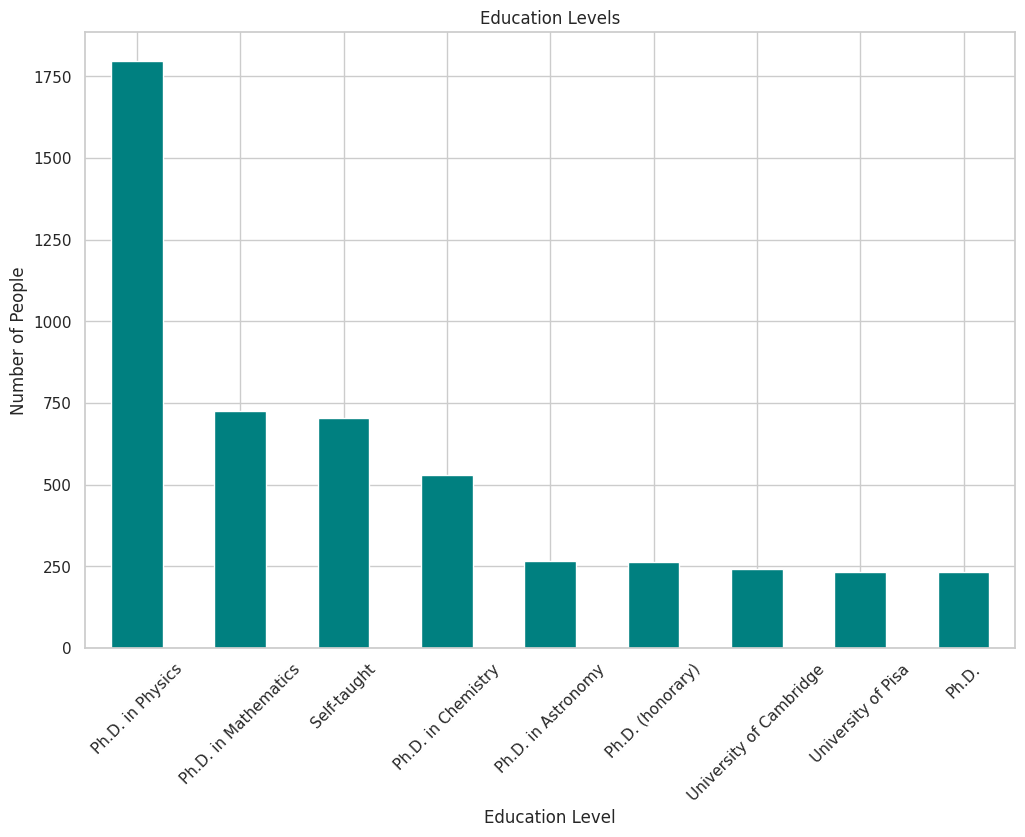

In [10]:
# Count the number of people with each education level
education_counts = df_cleaned['Education'].value_counts()

# Display education levels
print("\nEducation Levels:")
print(education_counts)

# Plot education levels
plt.figure(figsize=(12, 8))
education_counts.plot(kind='bar', color='teal')
plt.title('Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()



Influences:
Influence
Foundational work in quantum mechanics            472
Revolutionized modern physics                     280
Laid the groundwork for modern computing          278
Evolutionary biology pioneer                      273
Iconic Renaissance artist and inventor            255
Contributions to cosmology and quantum gravity    255
Quantum electrodynamics and physics teaching      254
Popularizing science and cosmology                253
Discovery of electromagnetic induction            253
Developed quantum theory                          251
Wave mechanics in quantum physics                 247
Pioneering research in radioactivity              247
Early pioneer of computer science                 247
Foundation of classical mechanics                 243
Nuclear physics and reactor development           242
Inventor and electrical engineering pioneer       239
Major advancements in astronomy                   238
Unified theory of electromagnetism                238
Penro

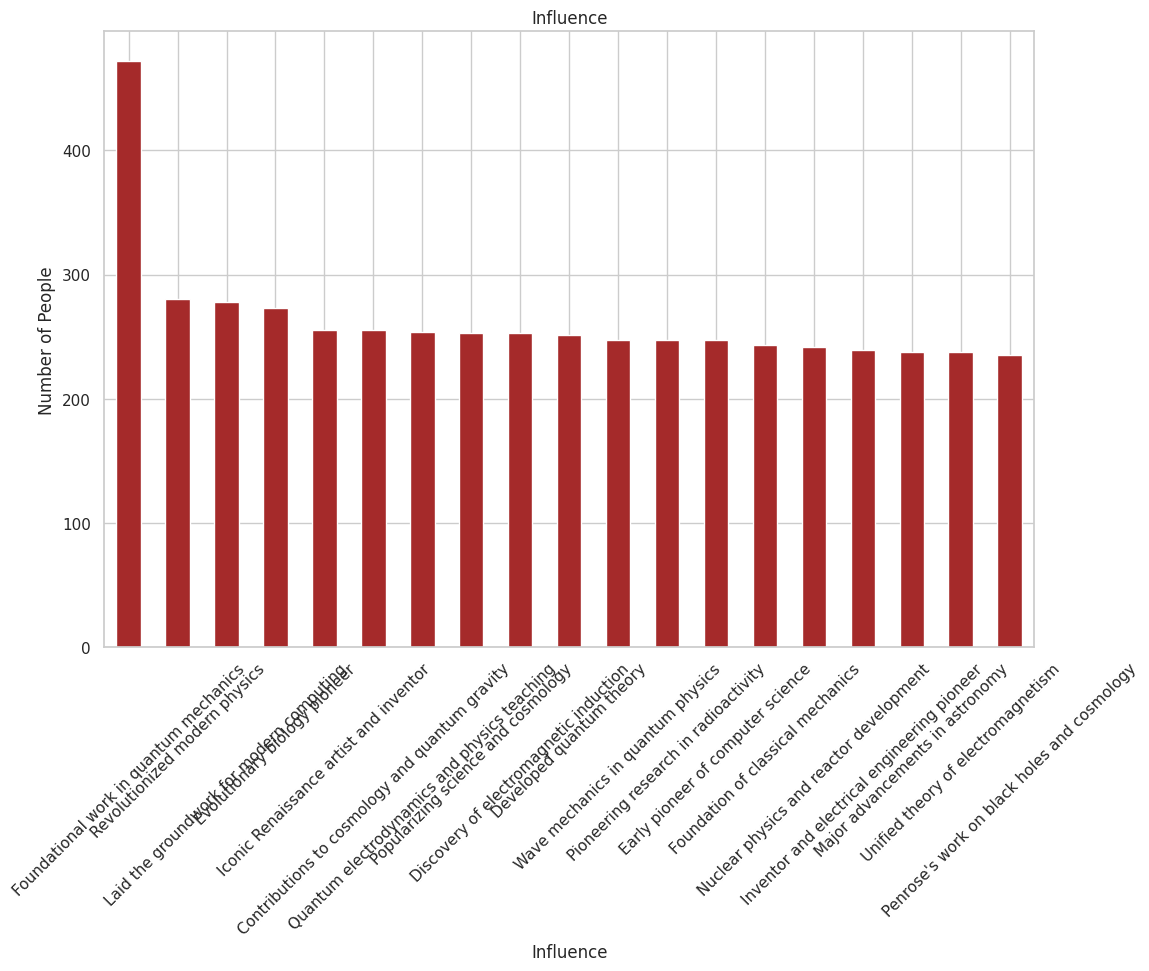

In [11]:
# Count the number of people with each influence
influence_counts = df_cleaned['Influence'].value_counts()

# Display influence counts
print("\nInfluences:")
print(influence_counts)

# Plot influences
plt.figure(figsize=(12, 8))
influence_counts.plot(kind='bar', color='brown')
plt.title('Influence')
plt.xlabel('Influence')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()
